 Data Visualization

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load the 'taxis' dataset
df = sns.load_dataset("taxis")

In [51]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [58]:
df.isnull().sum()


,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


In [59]:
df['payment'] = df['payment'].fillna(df['payment'].mode()[0])

In [60]:
df['pickup_zone'] = df['pickup_zone'].fillna(df['pickup_zone'].mode()[0])

In [61]:
df['dropoff_zone'] = df['dropoff_zone'].fillna(df['dropoff_zone'].mode()[0])

In [62]:
df['pickup_borough'] = df['pickup_borough'].fillna(df['pickup_borough'].mode()[0])

In [63]:
df['dropoff_borough'] = df['dropoff_borough'].fillna(df['dropoff_borough'].mode()[0])

Visualizations using Matplotlib/Pandas Plot

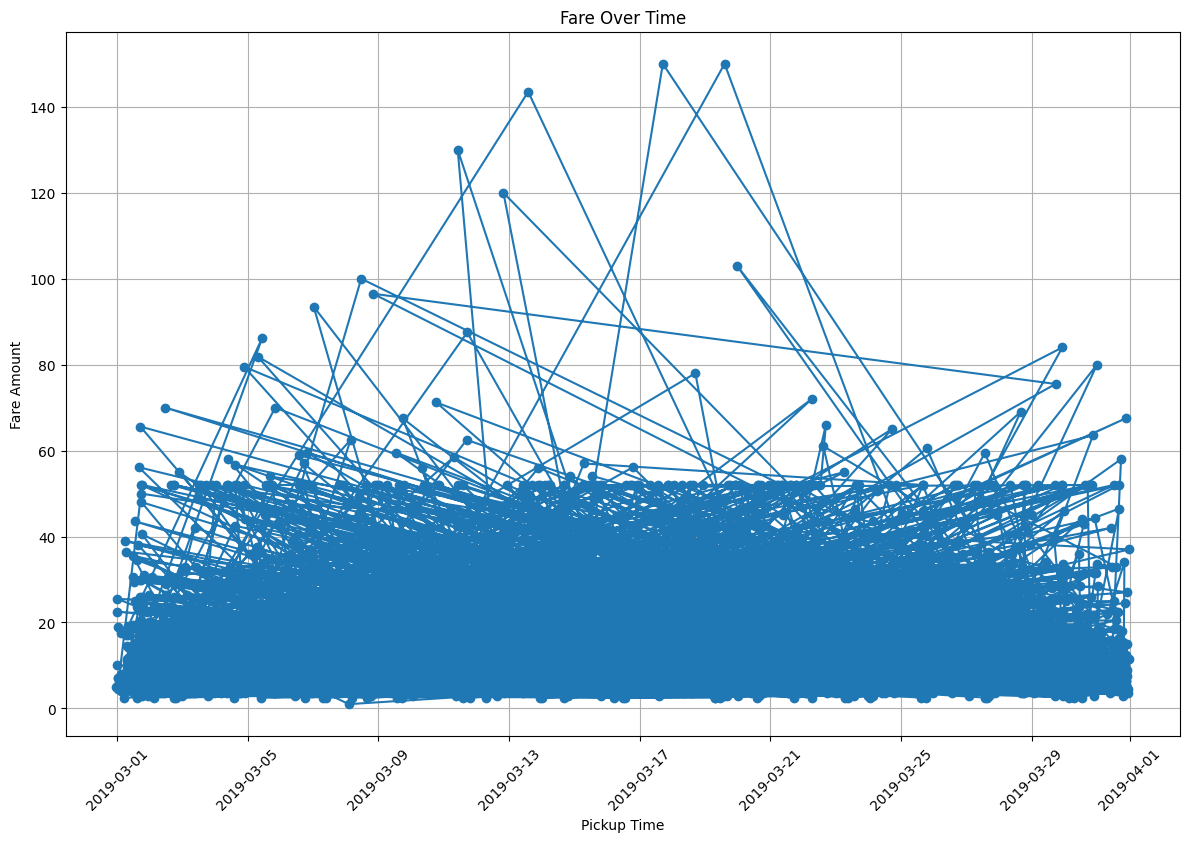

In [89]:
#Line chart
plt.figure(figsize=(12,8))
plt.plot(df['pickup'],df['fare'],marker = 'o')
plt.xlabel("Pickup Time")
plt.ylabel("Fare Amount")
plt.title("Fare Over Time")
plt.tight_layout()
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [78]:
borough_fare = df.groupby('pickup_borough')['fare'].sum()
borough_fare

,fare
pickup_borough,
Bronx,2078.91
Brooklyn,6327.48
Manhattan,59426.42
Queens,16382.06


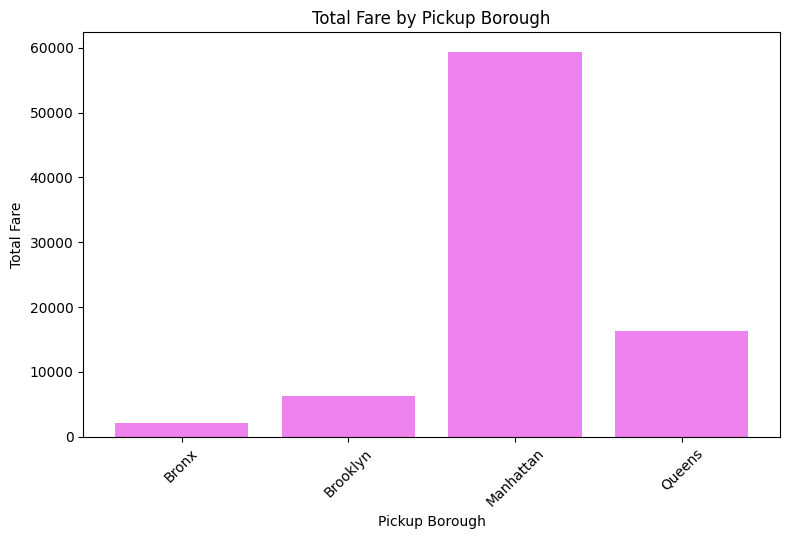

In [90]:
#Bar Chart
plt.figure(figsize=(8,5))
plt.bar(borough_fare.index , borough_fare.values , color = 'violet')
plt.xlabel("Pickup Borough")
plt.ylabel("Total Fare")
plt.title("Total Fare by Pickup Borough")
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

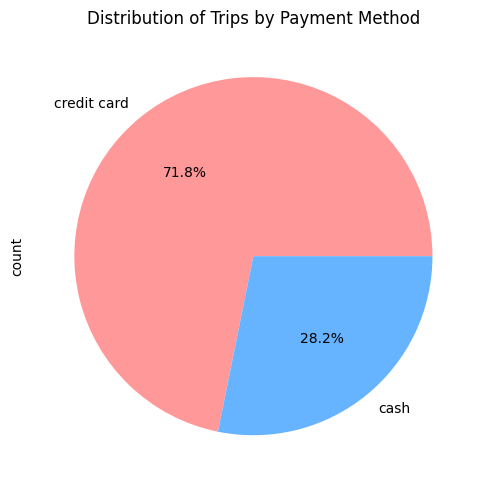

In [103]:
#Pie Chart
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(5,5))
df['payment'].value_counts().plot.pie( autopct='%1.1f%%' , colors = colors)
plt.title("Distribution of Trips by Payment Method")
plt.tight_layout()
plt.show()

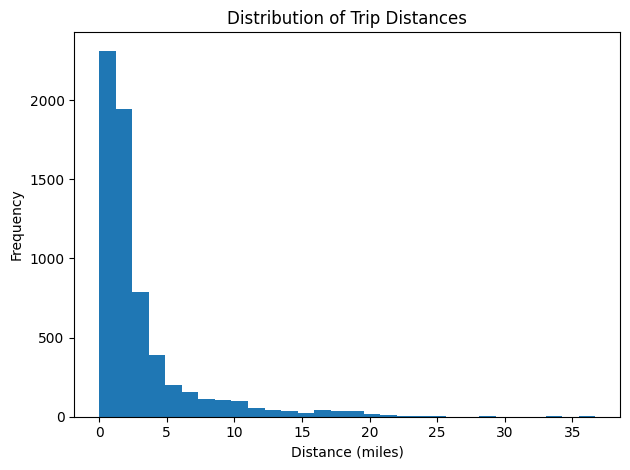

In [107]:
#Histogram
plt.hist(df['distance'], bins=30)
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distances")
plt.tight_layout()
plt.show()

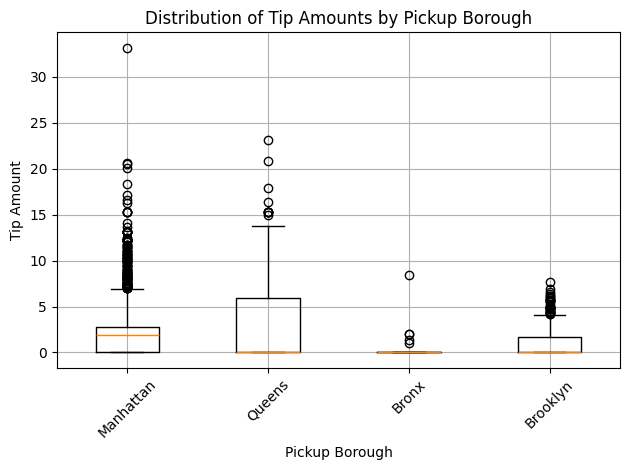

In [115]:
#Box plot
plt.boxplot(
    [df[df['pickup_borough'] == borough]['tip'] for borough in df['pickup_borough'].unique()],
    tick_labels=df['pickup_borough'].unique())
plt.xlabel("Pickup Borough")
plt.ylabel("Tip Amount")
plt.title("Distribution of Tip Amounts by Pickup Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Visualizations using Seaborn

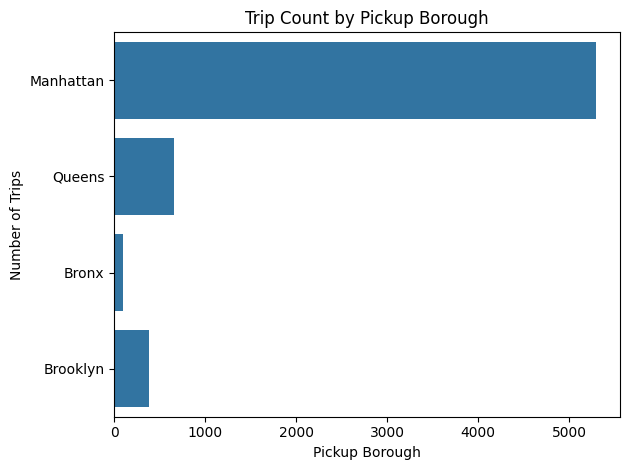

In [123]:
  #Count Plot
sns.countplot(data = df , y = 'pickup_borough')
plt.xlabel("Pickup Borough")
plt.ylabel("Number of Trips")
plt.title("Trip Count by Pickup Borough")
plt.tight_layout()
plt.show()


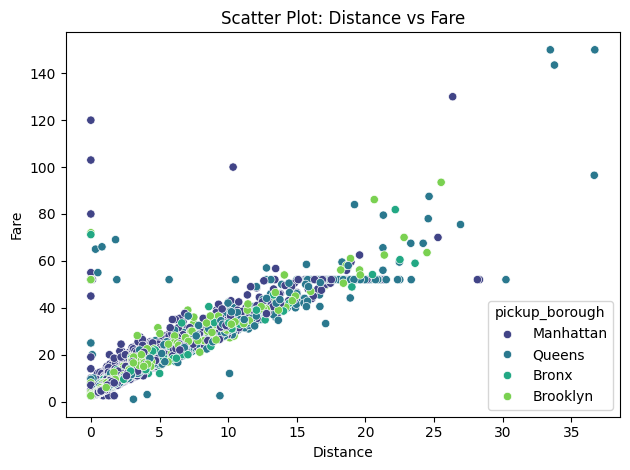

In [125]:
#scatter Plot
sns.scatterplot(data=df , x = 'distance', y = 'fare', hue = 'pickup_borough', palette= 'viridis')
plt.title("Scatter Plot: Distance vs Fare")
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.tight_layout()
plt.show()

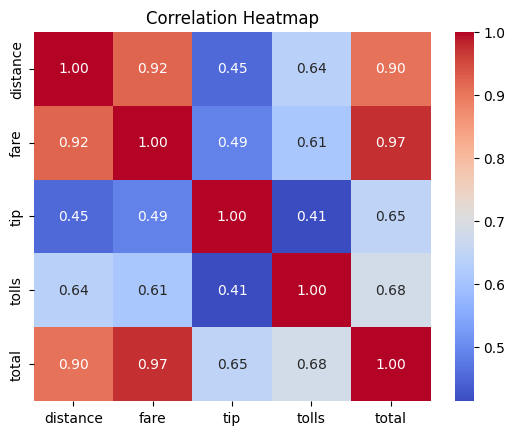

In [126]:
#heat map
num_cols = ['distance', 'fare', 'tip', 'tolls', 'total']
corr_matrix = df[num_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

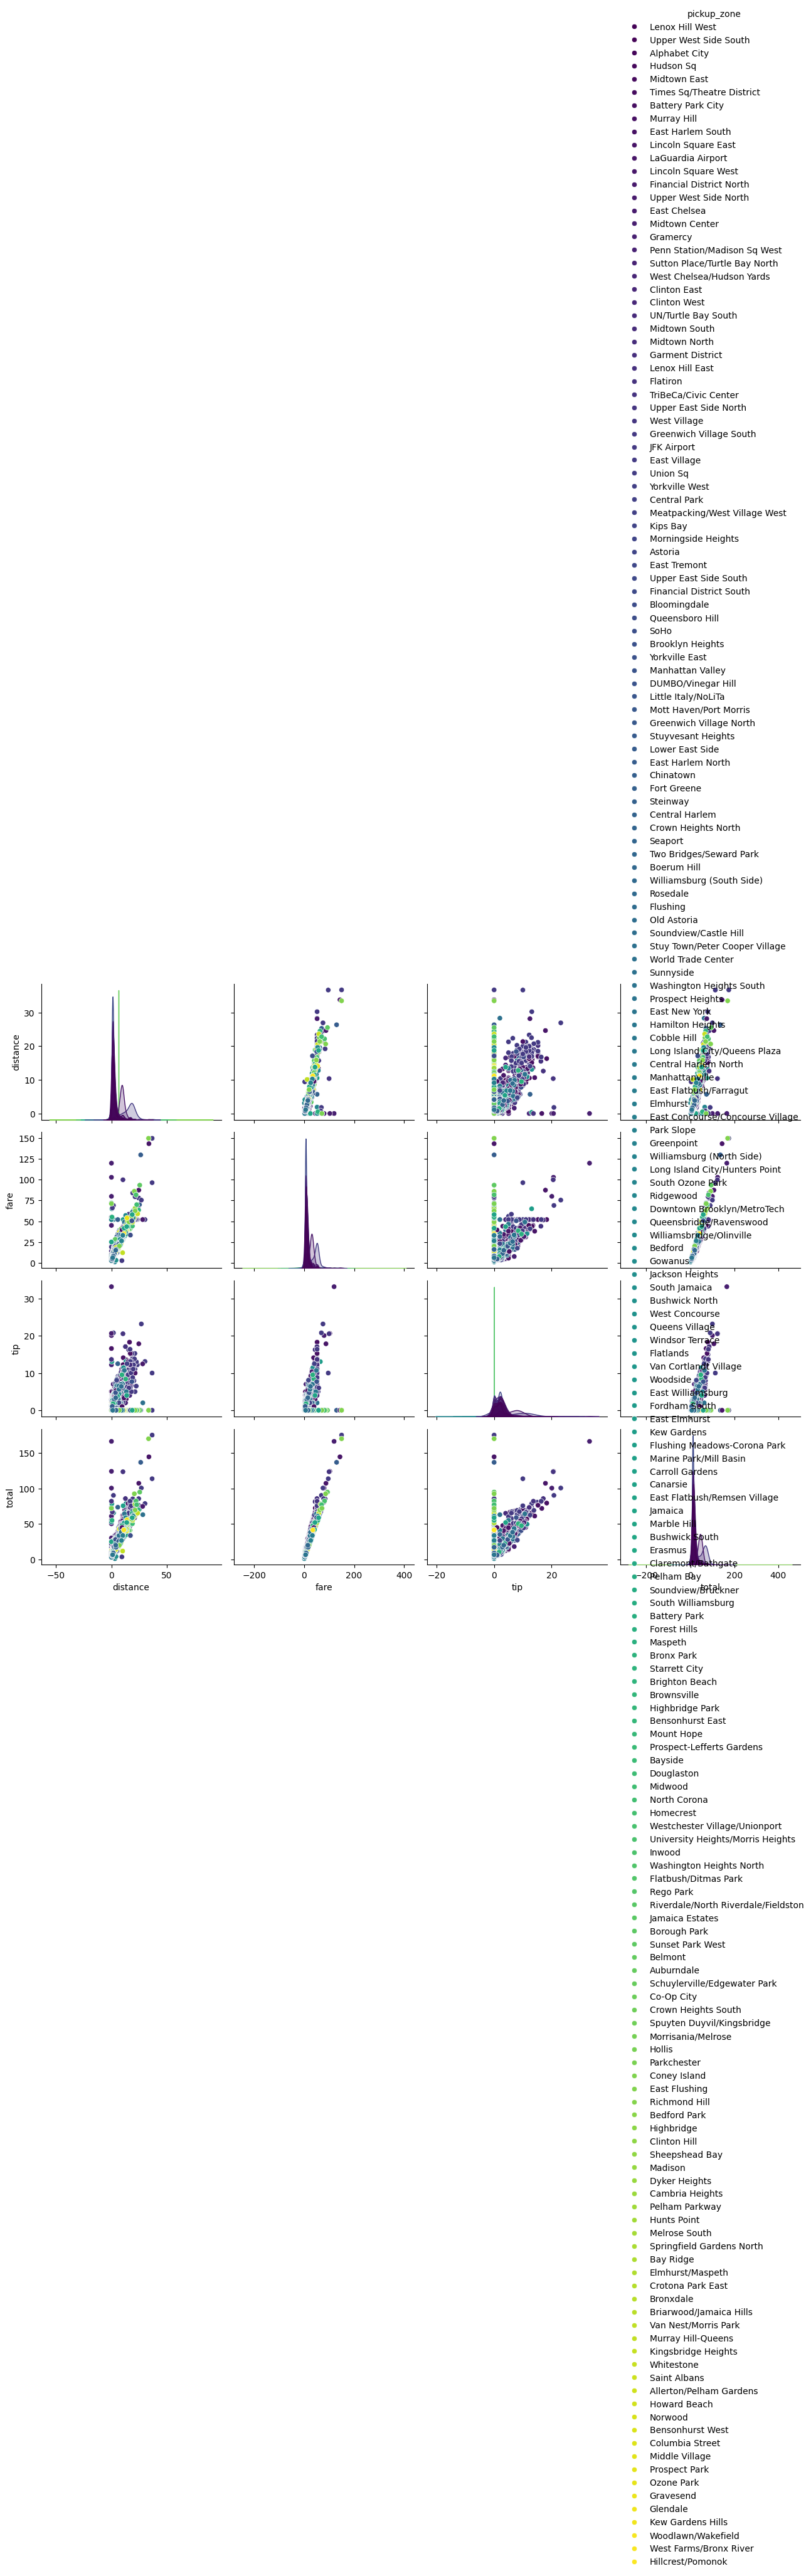

In [131]:
#pair Plot
sns.pairplot(df[['distance', 'fare', 'tip', 'total', 'pickup_zone']],hue='pickup_zone', palette= 'viridis')
plt.tight_layout()
plt.show()

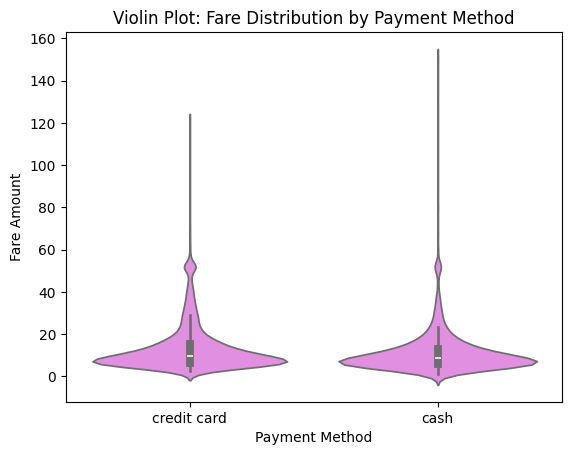

In [137]:
sns.violinplot(data=df,x='payment',y='fare', color = 'violet')
plt.title("Violin Plot: Fare Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Fare Amount")
plt.show()